In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error as mae
import warnings
import datetime

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dữ-liệu-Lịch-sử-AGR.csv',delimiter=";")
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df

,Price,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,"6062,9","5964,5","6200,7","5964,5",930.28K,1.65%
2018-01-03,"5885,7","6102,2","6161,3","5757,8",889.20K,-2.92%
2018-01-04,"5895,6",5807,6053,"5797,1",1.08M,0.17%
2018-01-05,5807,"6072,7","6072,7",5807,943.35K,-1.50%
2018-01-08,"5698,7","5905,4","5915,2","5659,3",790.88K,-1.86%
...,...,...,...,...,...,...
2023-12-11,16050,16150,16150,15750,1.52M,0.00%
2023-12-12,15950,16050,16250,15950,706.20K,-0.62%
2023-12-13,15800,16000,16300,15700,1.54M,-0.94%


In [3]:
def custom_float_conversion(value):
    try:
        # Replace commas with dots and convert to float
        cleaned_value = float(value.replace(',', '.'))
        return cleaned_value
    except (ValueError, AttributeError):
        return np.nan

In [4]:
df['Price']=df['Price'].apply(custom_float_conversion)

<Axes: xlabel='Date'>

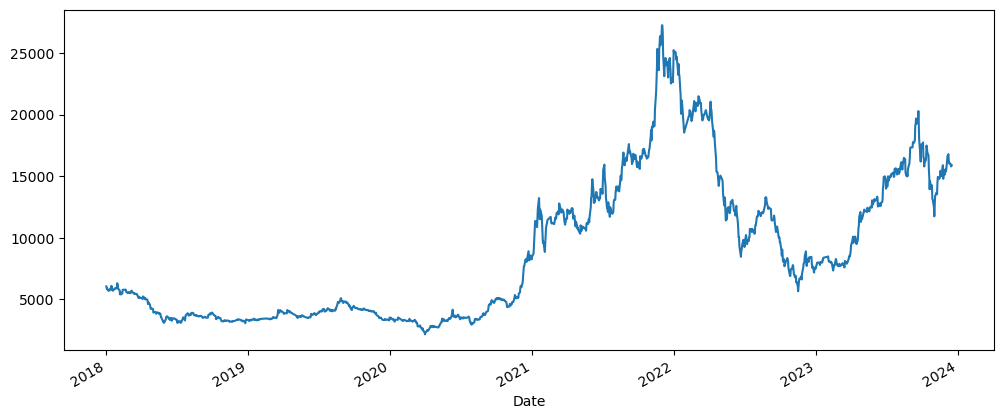

In [5]:
df['Price'].plot(figsize=(12,5))

In [161]:
#split training and testing data for SVR (7:3)
train_size1 = int(0.7 * len(df))

y = df[['Price']] 
X = df[['High']] 


y_train1 = y[:train_size1]
X_train1 = X[:train_size1]
y_test1 = y[train_size1:]
X_test1 = X[train_size1:]


In [162]:
#split training and testing data for SVR (8:2)
train_size2 = int(0.8 * len(df))

y = df[['Price']] 
X = df[['High']] 

y_train2 = y[:train_size2]
X_train2 = X[:train_size2]
y_test2 = y[train_size2:]
X_test2 = X[train_size2:]


In [163]:
#split training and testing data for SVR (9:1)
train_size3 = int(0.9 * len(df))

y = df[['Price']] 
X = df[['High']] 

y_train3 = y[:train_size3]
X_train3 = X[:train_size3]
y_test3 = y[train_size3:]
X_test3 = X[train_size3:]

In [164]:
#Creating SVR model (7:3)

svr_rbf1 = SVR(kernel='rbf', C=1000)
svr_rbf1.fit(X_train1, y_train1)

svr_poly1 = SVR(kernel='poly', C=1000, degree = 2)
svr_poly1.fit(X_train1, y_train1)

svr_sigmoid1 = SVR(kernel='sigmoid')
svr_sigmoid1.fit(X_train1, y_train1)

SVR(kernel='sigmoid')

In [165]:
#Creating SVR model (8:2)

svr_rbf2 = SVR(kernel='rbf', C=1000)
svr_rbf2.fit(X_train2, y_train2)

svr_poly2 = SVR(kernel='poly', C=1000, degree = 2)
svr_poly2.fit(X_train2, y_train2)

svr_sigmoid2 = SVR(kernel='sigmoid')
svr_sigmoid2.fit(X_train2, y_train2)

SVR(kernel='sigmoid')

In [166]:
#Creating SVR model (9:1)

svr_rbf3 = SVR(kernel='rbf', C=1000)
svr_rbf3.fit(X_train3, y_train3)

svr_poly3 = SVR(kernel='poly', C=1000, degree = 2)
svr_poly3.fit(X_train3, y_train3)

svr_sigmoid3 = SVR(kernel='sigmoid')
svr_sigmoid3.fit(X_train3, y_train3)

SVR(kernel='sigmoid')

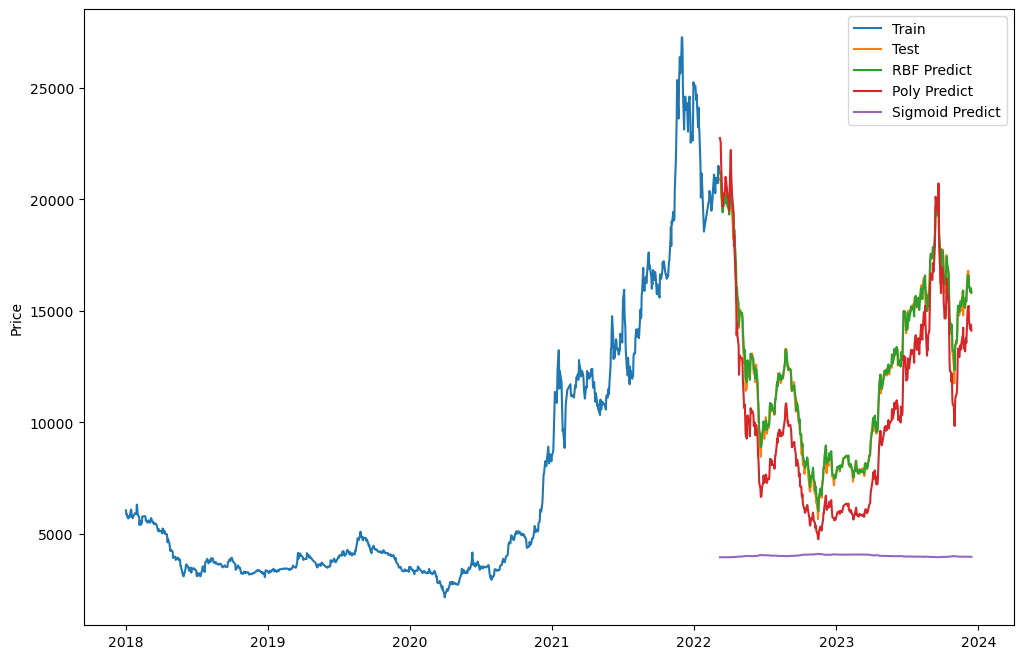

In [167]:
# predict for SVR (7:3)
y_pred_rbf1 = svr_rbf1.predict(X_test1).reshape(-1, 1)

y_pred_poly1 = svr_poly1.predict(X_test1).reshape(-1, 1)

y_pred_sigmoid1 = svr_sigmoid1.predict(X_test1).reshape(-1, 1)

#Visualize
plt.figure(figsize=(12, 8))
plt.plot(y_train1, label='Train')
plt.plot(y_test1, label='Test')
plt.plot(X_test1.index, y_pred_rbf1, label='RBF Predict')
plt.plot(X_test1.index, y_pred_poly1, label='Poly Predict')
plt.plot(X_test1.index, y_pred_sigmoid1, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

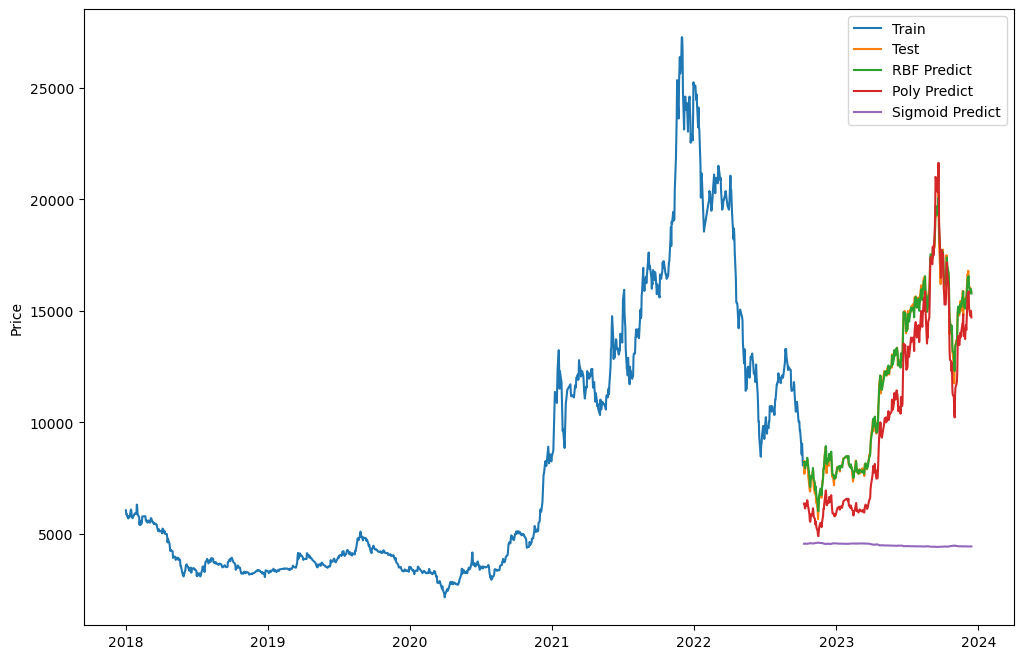

In [168]:
# predict for SVR (8:2)
y_pred_rbf2 = svr_rbf2.predict(X_test2).reshape(-1, 1)

y_pred_poly2 = svr_poly2.predict(X_test2).reshape(-1, 1)

y_pred_sigmoid2 = svr_sigmoid2.predict(X_test2).reshape(-1, 1)

#Visualize
plt.figure(figsize=(12, 8))
plt.plot(y_train2, label='Train')
plt.plot(y_test2, label='Test')
plt.plot(X_test2.index, y_pred_rbf2, label='RBF Predict')
plt.plot(X_test2.index, y_pred_poly2, label='Poly Predict')
plt.plot(X_test2.index, y_pred_sigmoid2, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

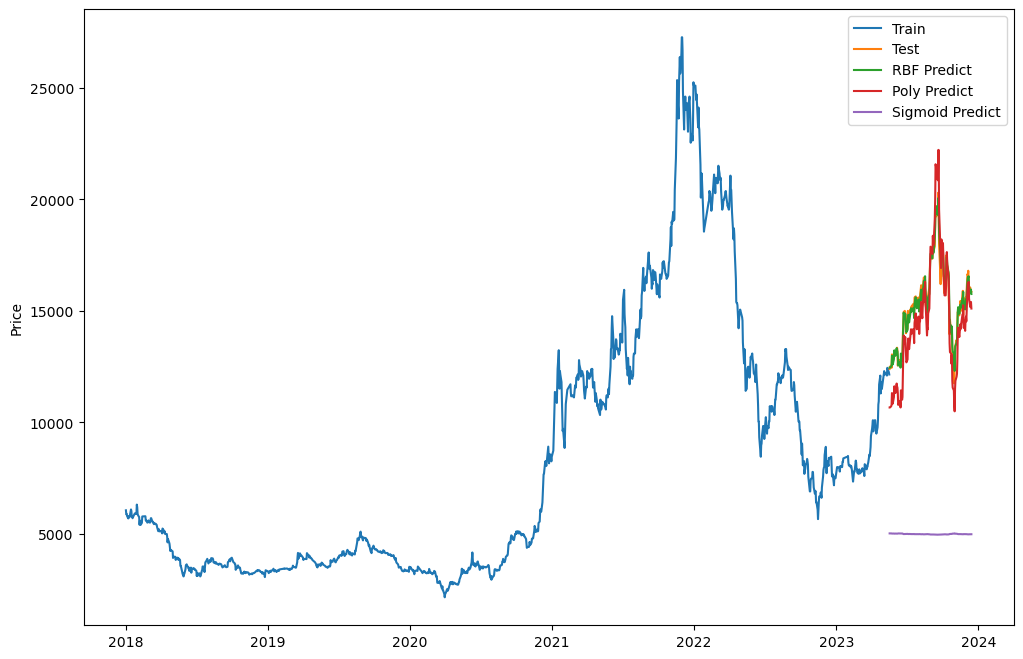

In [169]:
# predict for SVR (9:1)
y_pred_rbf3 = svr_rbf3.predict(X_test3).reshape(-1, 1)

y_pred_poly3 = svr_poly3.predict(X_test3).reshape(-1, 1)

y_pred_sigmoid3 = svr_sigmoid3.predict(X_test3).reshape(-1, 1)

#Visualize
plt.figure(figsize=(12, 8))
plt.plot(y_train3, label='Train')
plt.plot(y_test3, label='Test')
plt.plot(X_test3.index, y_pred_rbf3, label='RBF Predict')
plt.plot(X_test3.index, y_pred_poly3, label='Poly Predict')
plt.plot(X_test3.index, y_pred_sigmoid3, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

In [170]:
#Take the last data in the dataset
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[15850.]])

In [171]:
# Evaluate the accuracy (model 7:3)
mape_rbf1 = mean_absolute_percentage_error(y_test1, y_pred_rbf1) * 100
mae_rbf1 = mae(y_test1, y_pred_rbf1)
test_rmse_rbf1 = np.sqrt(np.mean((y_pred_rbf1 - y_test1)**2))
msle_rbf1 = mean_squared_log_error(y_test1, y_pred_rbf1)

mape_poly1 = mean_absolute_percentage_error(y_test1, y_pred_poly1) * 100
mae_poly1 = mae(y_test1, y_pred_poly1)
test_rmse_poly1 = np.sqrt(np.mean((y_pred_poly1 - y_test1)**2))
msle_poly1 = mean_squared_log_error(y_test1, y_pred_poly1)

mape_sigmoid1 = mean_absolute_percentage_error(y_test1, y_pred_sigmoid1) * 100
mae_sigmoid1 = mae(y_test1, y_pred_sigmoid1)
test_rmse_sigmoid1 = np.sqrt(np.mean((y_pred_sigmoid1 - y_test1)**2))
msle_sigmoid1 = mean_squared_log_error(y_test1, y_pred_sigmoid1)


print("RBF MAPE:\t", mape_rbf1)
print("RBF MSLE:\t", msle_rbf1)
print("RBF MAE: \t",  mae_rbf1)
print("RBF RMSE:\t", test_rmse_rbf1)
print("\n\n")
print("Poly MAPE:\t", mape_poly1)
print("Poly MSLE:\t", msle_poly1)
print("Poly MAE:\t",  mae_poly1)
print("Poly RMSE:\t", test_rmse_poly1)
print("\n\n")
print("Sigmoid MAPE:\t", mape_sigmoid1)
print("Sigmoid MSLE:\t", msle_sigmoid1)
print("Sigmoid MAE:\t",  mae_sigmoid1)
print("Sigmoid RMSE:\t", test_rmse_sigmoid1)

RBF MAPE:	 1.6378702690543132
RBF MSLE:	 0.0005405979374215584
RBF MAE: 	 191.80758018960134
RBF RMSE:	 Price    278.0181
dtype: float64



Poly MAPE:	 17.463937383310498
Poly MSLE:	 0.04589790318956627
Poly MAE:	 1894.3171185062884
Poly RMSE:	 Price    1995.762529
dtype: float64



Sigmoid MAPE:	 63.80334635405489
Sigmoid MSLE:	 1.2459661866747238
Sigmoid MAE:	 8266.186394443479
Sigmoid RMSE:	 Price    9102.846817
dtype: float64


In [172]:
# Evaluate the accuracy (model 8:2)
mape_rbf2 = mean_absolute_percentage_error(y_test2, y_pred_rbf2) * 100
mae_rbf2 = mae(y_test2, y_pred_rbf2)
test_rmse_rbf2 = np.sqrt(np.mean((y_pred_rbf2 - y_test2)**2))

mape_poly2 = mean_absolute_percentage_error(y_test2, y_pred_poly2) * 100
mae_poly2 = mae(y_test2, y_pred_poly2)
test_rmse_poly2 = np.sqrt(np.mean((y_pred_poly2 - y_test2)**2))

mape_sigmoid2 = mean_absolute_percentage_error(y_test2, y_pred_sigmoid2) * 100
mae_sigmoid2 = mae(y_test2, y_pred_sigmoid2)
test_rmse_sigmoid2 = np.sqrt(np.mean((y_pred_sigmoid2 - y_test2)**2))


msle_rbf2 = mean_squared_log_error(y_test2, y_pred_rbf2)
msle_poly2 = mean_squared_log_error(y_test2, y_pred_poly2)
msle_sigmoid2 = mean_squared_log_error(y_test2, y_pred_sigmoid2)


print("RBF MAPE:\t", mape_rbf2)
print("RBF MSLE:\t", msle_rbf2)
print("RBF MAE: \t",  mae_rbf2)
print("RBF RMSE:\t", test_rmse_rbf2)
print("\n\n")
print("Poly MAPE:\t", mape_poly2)
print("Poly MSLE:\t", msle_poly2)
print("Poly MAE:\t",  mae_poly2)
print("Poly RMSE:\t", test_rmse_poly2)
print("\n\n")
print("Sigmoid MAPE:\t", mape_sigmoid2)
print("Sigmoid MSLE:\t", msle_sigmoid2)
print("Sigmoid MAE:\t",  mae_sigmoid2)
print("Sigmoid RMSE:\t", test_rmse_sigmoid2)

RBF MAPE:	 1.5543518904089382
RBF MSLE:	 0.0004902049128477333
RBF MAE: 	 175.65831607466342
RBF RMSE:	 Price    255.022497
dtype: float64



Poly MAPE:	 14.995408035360086
Poly MSLE:	 0.03435038742466389
Poly MAE:	 1534.9749948847882
Poly RMSE:	 Price    1619.627631
dtype: float64



Sigmoid MAPE:	 57.47755438824564
Sigmoid MSLE:	 0.9554598463073579
Sigmoid MAE:	 7359.467891369328
Sigmoid RMSE:	 Price    8304.153734
dtype: float64


In [173]:
# Evaluate the accuracy (model 9:1)
mape_rbf3 = mean_absolute_percentage_error(y_test3, y_pred_rbf3) * 100
mae_rbf3 = mae(y_test3, y_pred_rbf3)
test_rmse_rbf3 = np.sqrt(np.mean((y_pred_rbf3 - y_test3)**2))

mape_poly3 = mean_absolute_percentage_error(y_test3, y_pred_poly3) * 100
mae_poly3 = mae(y_test3, y_pred_poly3)
test_rmse_poly3 = np.sqrt(np.mean((y_pred_poly3 - y_test3)**2))

mape_sigmoid3 = mean_absolute_percentage_error(y_test3, y_pred_sigmoid3) * 100
mae_sigmoid3 = mae(y_test3, y_pred_sigmoid3)
test_rmse_sigmoid3 = np.sqrt(np.mean((y_pred_sigmoid3 - y_test3)**2))

msle_rbf3 = mean_squared_log_error(y_test3, y_pred_rbf3)
msle_poly3 = mean_squared_log_error(y_test3, y_pred_poly3)
msle_sigmoid3 = mean_squared_log_error(y_test3, y_pred_sigmoid3)



print("RBF MAPE:\t", mape_rbf3)
print("RBF MSLE:\t", msle_rbf3)
print("RBF MAE: \t",  mae_rbf3)
print("RBF RMSE:\t", test_rmse_rbf3)
print("\n\n")
print("Poly MAPE:\t", mape_poly3)
print("Poly MSLE:\t", msle_poly3)
print("Poly MAE:\t",  mae_poly3)
print("Poly RMSE:\t", test_rmse_poly3)
print("\n\n")
print("Sigmoid MAPE:\t", mape_sigmoid3)
print("Sigmoid MSLE:\t", msle_sigmoid3)
print("Sigmoid MAE:\t",  mae_sigmoid3)
print("Sigmoid RMSE:\t", test_rmse_sigmoid3)

RBF MAPE:	 1.42802314701359
RBF MSLE:	 0.00038804687693710086
RBF MAE: 	 217.46861466171939
RBF RMSE:	 Price    304.70245
dtype: float64



Poly MAPE:	 7.28915101702909
Poly MSLE:	 0.007655885680992457
Poly MAE:	 1071.4225033874798
Poly RMSE:	 Price    1200.788395
dtype: float64



Sigmoid MAPE:	 66.85592276929572
Sigmoid MSLE:	 1.2481516299531228
Sigmoid MAE:	 10283.808592070987
Sigmoid RMSE:	 Price    10435.445089
dtype: float64


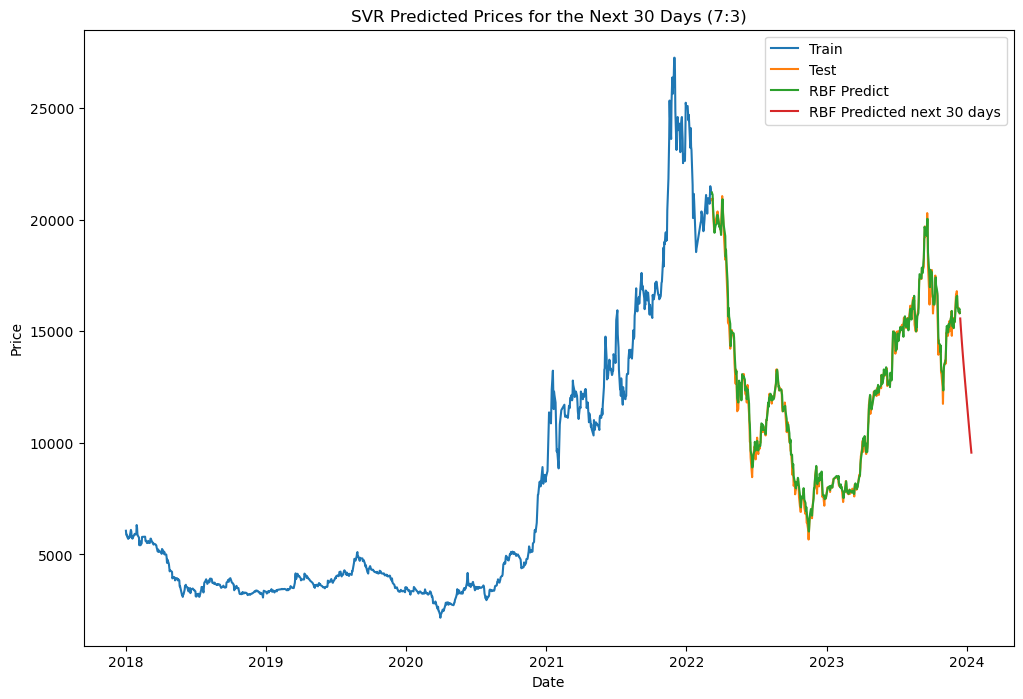

In [174]:
#Predict for next 30 days (7:3)

last_date = df.index[-1]

# Generate dates for the next 30 days
next_30_days1 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str1 = [date.strftime('%Y-%m-%d') for date in next_30_days1]

# Predict values for the next 30 days
x_next_30_day_rbf1 = []
x_next_30_day_poly1 = []
x_next_30_day_sigmoid1 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1]).reshape(-1, 1)

for i in range(30):
    # Predict using RBF model
    x_pred_next_rbf1 = svr_rbf1.predict(last_data)[0]
    x_next_30_day_rbf1.append(x_pred_next_rbf1)

    # Predict using Poly model
    x_pred_next_poly1 = svr_poly1.predict(last_data)[0]
    x_next_30_day_poly1.append(x_pred_next_poly1)

    # Predict using Sigmoid model
    x_pred_next_sigmoid1= svr_sigmoid1.predict(last_data)[0]
    x_next_30_day_sigmoid1.append(x_pred_next_sigmoid1)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_rbf1, x_pred_next_poly1, x_pred_next_sigmoid1]).reshape(-1, 1)

# Plot actual and predicted values
plt.figure(figsize=(12, 8))

plt.plot(y_train1, label='Train')
plt.plot(y_test1, label='Test')
plt.plot(X_test1.index, y_pred_rbf1, label='RBF Predict')
plt.plot(next_30_days1, x_next_30_day_rbf1, label='RBF Predicted next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (7:3)')
plt.legend()
plt.show()


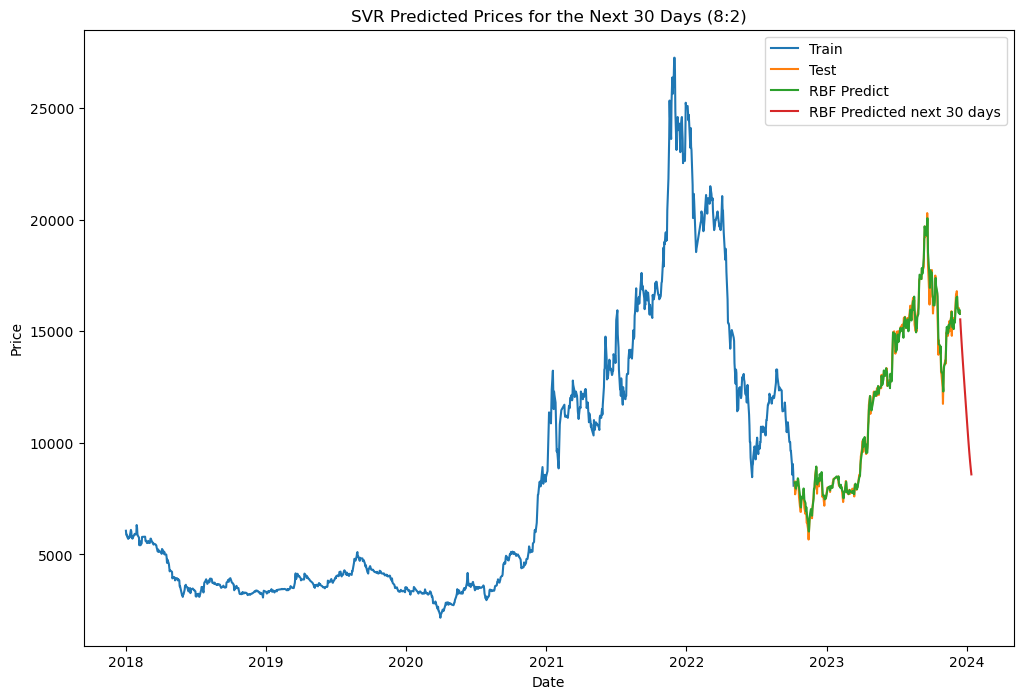

In [175]:
#Predict for next 30 days (8:2)

last_date = df.index[-1]

# Generate dates for the next 30 days
next_30_days2 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str2 = [date.strftime('%Y-%m-%d') for date in next_30_days2]

# Predict values for the next 30 days
x_next_30_day_rbf2 = []
x_next_30_day_poly2 = []
x_next_30_day_sigmoid2 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1]).reshape(-1, 1)

for i in range(30):
    # Predict using RBF model
    x_pred_next_rbf2 = svr_rbf2.predict(last_data)[0]
    x_next_30_day_rbf2.append(x_pred_next_rbf2)

    # Predict using Poly model
    x_pred_next_poly2 = svr_poly2.predict(last_data)[0]
    x_next_30_day_poly2.append(x_pred_next_poly2)

    # Predict using Sigmoid model
    x_pred_next_sigmoid2= svr_sigmoid2.predict(last_data)[0]
    x_next_30_day_sigmoid2.append(x_pred_next_sigmoid2)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_rbf2, x_pred_next_poly2, x_pred_next_sigmoid2]).reshape(-1, 1)

# Plot actual and predicted values
plt.figure(figsize=(12, 8))

plt.plot(y_train2, label='Train')
plt.plot(y_test2, label='Test')
plt.plot(X_test2.index, y_pred_rbf2, label='RBF Predict')
plt.plot(next_30_days2, x_next_30_day_rbf2, label='RBF Predicted next 30 days')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (8:2)')
plt.legend()
plt.show()


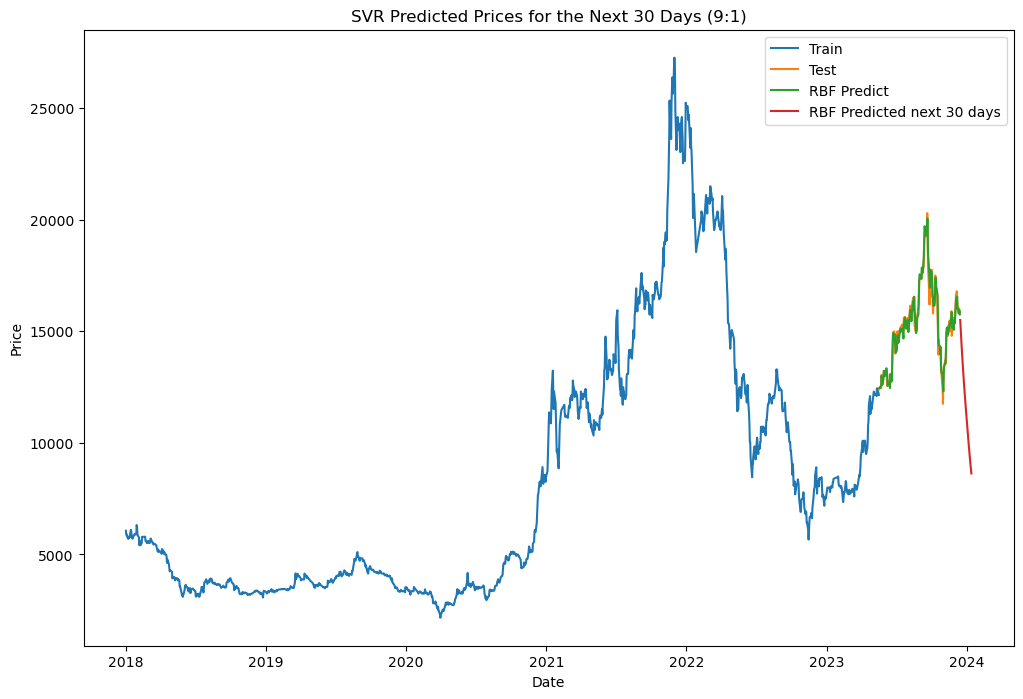

In [176]:
#Predict for next 30 days (9:1)

last_date = df.index[-1]

# Generate dates for the next 30 days
next_30_days3 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str3 = [date.strftime('%Y-%m-%d') for date in next_30_days3]

# Predict values for the next 30 days
x_next_30_day_rbf3 = []
x_next_30_day_poly3 = []
x_next_30_day_sigmoid3 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1]).reshape(-1, 1)

for i in range(30):
    # Predict using RBF model
    x_pred_next_rbf3 = svr_rbf3.predict(last_data)[0]
    x_next_30_day_rbf3.append(x_pred_next_rbf3)

    # Predict using Poly model
    x_pred_next_poly3 = svr_poly3.predict(last_data)[0]
    x_next_30_day_poly3.append(x_pred_next_poly3)

    # Predict using Sigmoid model
    x_pred_next_sigmoid3 = svr_sigmoid3.predict(last_data)[0]
    x_next_30_day_sigmoid3.append(x_pred_next_sigmoid3)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_rbf3, x_pred_next_poly3, x_pred_next_sigmoid3]).reshape(-1, 1)

# Plot actual and predicted values
plt.figure(figsize=(12, 8))

plt.plot(y_train3, label='Train')
plt.plot(y_test3, label='Test')
plt.plot(X_test3.index, y_pred_rbf3, label='RBF Predict')
plt.plot(next_30_days3, x_next_30_day_rbf3, label='RBF Predicted next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (9:1)')
plt.legend()
plt.show()


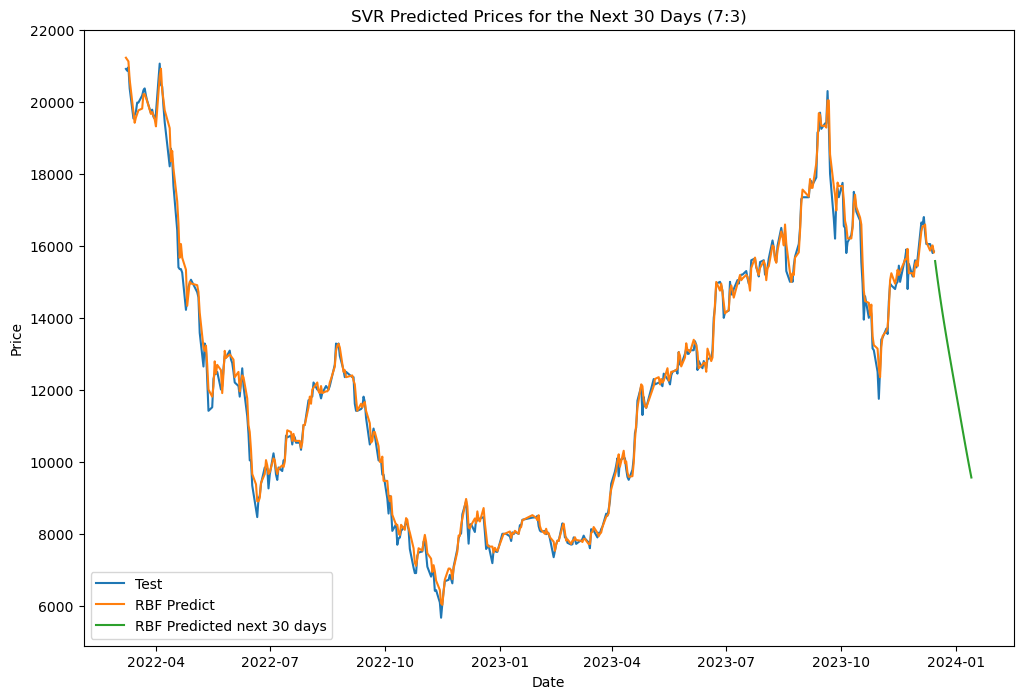

In [177]:
plt.figure(figsize=(12, 8))

plt.plot(y_test1, label='Test')
plt.plot(X_test1.index, y_pred_rbf1, label='RBF Predict')
plt.plot(next_30_days1, x_next_30_day_rbf1, label='RBF Predicted next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (7:3)')
plt.legend()
plt.show()

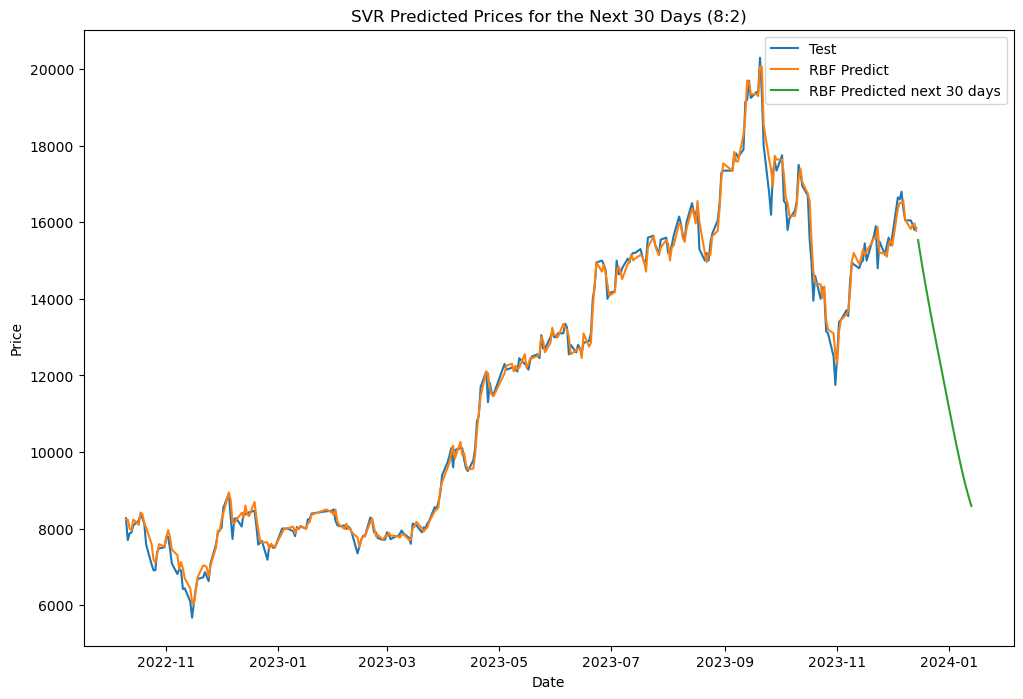

In [178]:
plt.figure(figsize=(12, 8))

plt.plot(y_test2, label='Test')
plt.plot(X_test2.index, y_pred_rbf2, label='RBF Predict')
plt.plot(next_30_days2, x_next_30_day_rbf2, label='RBF Predicted next 30 days')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (8:2)')
plt.legend()
plt.show()

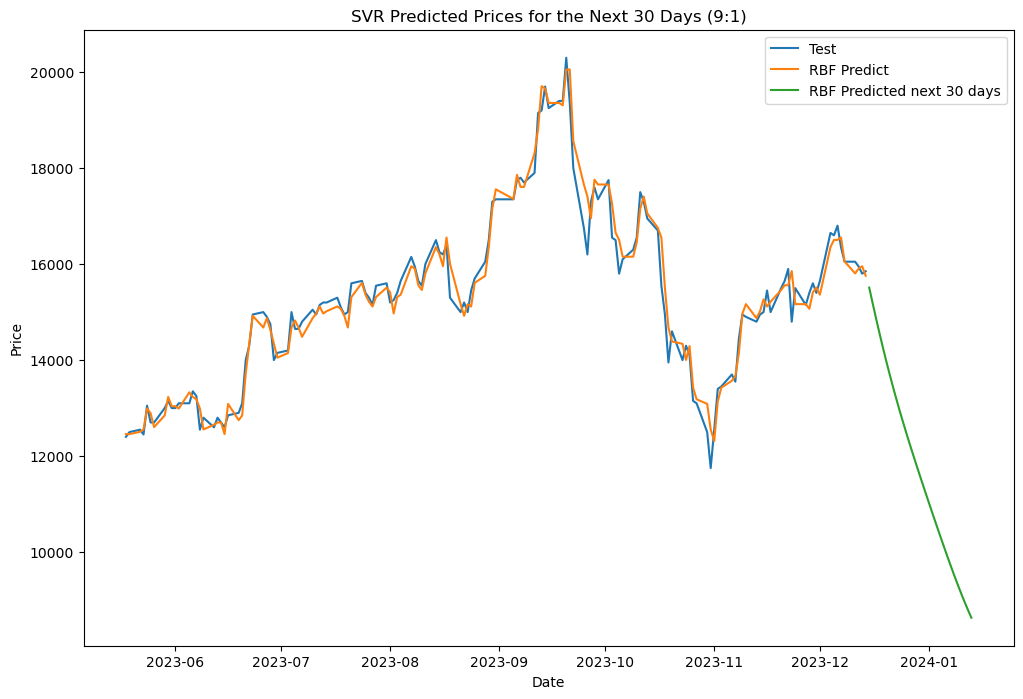

In [179]:
plt.figure(figsize=(12, 8))

plt.plot(y_test3, label='Test')
plt.plot(X_test3.index, y_pred_rbf3, label='RBF Predict')
plt.plot(next_30_days3, x_next_30_day_rbf3, label='RBF Predicted next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (9:1)')
plt.legend()
plt.show()
